# Time Series Project

This dataset was prepared to represent transactions performed in a dummy payments application.

The final result must be a projection of the monthly volume transacted for
the next 3 months (counting from the month of the last transaction
completed).

Before proceeding, it is mandatory a previous description of each column, according to the dataset source:

• transaction_id: Unique id for transactions

• payer_id: Paying user's unique id

• payee_id: Unique id of the receiving user**

• value: transaction amount

• discount: Discount amount received on transaction

• transaction_date: When the transaction was performed

• type: Transaction feature**

** Transactions of type = P2P represent the payments done from one user to another.
In these cases, payee_id is the unique id of the receiving user. 


## Dados e Configuração

In [1]:
import pandas as pd
series = pd.read_csv('Timeseries_dateset.csv')

In [2]:
type(series)

pandas.core.frame.DataFrame

In [3]:
series.tail()

,transaction_id,payer_id,payee_id,value,discount,transaction_date,type
1215219,51539704470,430655459,216460809,120.0,0.0,2017-04-10,P2P
1215220,51539704471,-1792141382,-235440250,20.0,0.0,2017-04-10,P2P
1215221,51539704472,-368948029,-267874618,20.0,0.0,2017-04-11,P2P
1215222,51539704473,-1588059460,566589435,8.5,0.0,2017-04-11,P2P
1215223,51539704474,-1020204888,-99684617,10.0,0.0,2017-04-11,P2P


In [4]:
series.head()

,transaction_id,payer_id,payee_id,value,discount,transaction_date,type
0,8589934592,-73388700,0,164.00,0.0,2017-11-28,ECOMMERCE
1,8589934593,89540967,0,2.10,0.0,2017-11-28,TRANSPORTATION
2,8589934594,159713446,0,3.50,0.0,2017-11-28,TRANSPORTATION
3,8589934595,8733054,0,8.25,0.0,2017-11-28,GAS
4,8589934596,131670186,0,424.46,0.0,2017-11-28,HOUSING


In [5]:
from pandas import read_csv
series = read_csv('Timeseries_dateset.csv', header=0, index_col=5, parse_dates=True, squeeze=True)

In [6]:
series.drop('payer_id',axis=1,inplace=True)

In [7]:
series.drop('type',axis=1,inplace=True)

In [8]:
series.drop('payee_id',axis=1,inplace=True)

In [9]:
series.drop('discount',axis=1,inplace=True)

In [10]:
series.drop('transaction_id',axis=1,inplace=True)

In [11]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215224 entries, 2017-11-28 to 2017-04-11
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   value   1215224 non-null  float64
dtypes: float64(1)
memory usage: 18.5 MB


In [12]:
upsampled = series.resample('3M')

In [13]:
quarter_sales = upsampled.mean()

In [14]:
print (quarter_sales)

                       value
transaction_date            
2016-12-31         92.588989
2017-03-31         66.843703
2017-06-30         78.760696
2017-09-30         88.032725
2017-12-31        107.970418
2018-03-31        153.946528


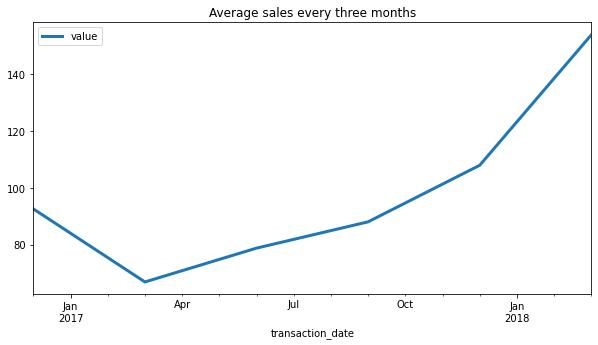

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
quarter_sales.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Average sales every three months')
pyplot.show()